<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.3 - Central Limit Theorem

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
house_hold_csv = "/Users/stephanienduaguba/Documents/DATA/Family_Income_and_Expenditure.csv"
# Read CSV
house_hold = pd.read_csv(house_hold_csv)

In [3]:
# Head
house_hold.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [4]:
# Tail
house_hold.tail()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# Shape
house_hold.shape

(41544, 60)

In [7]:
# Data Types
house_hold.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

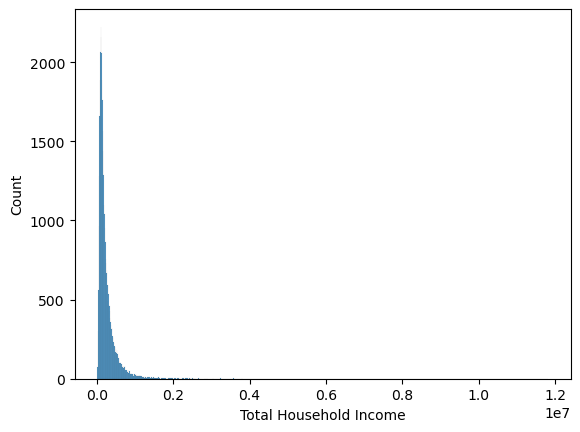

In [12]:
# ANSWER
sns.histplot(house_hold['Total Household Income']);

##### 2. How would you describe the shape of this population?

**ANSWER:**
SN_note: The "Total Household Income" is positively skewed.

Note on shape of distribution:

Symmetrical Distribution: In a perfectly symmetrical (normal) distribution, the histogram will appear as a bell-shaped curve, with the mean (average) at the center. Data values are evenly distributed on both sides of the mean.

Skewed Right (Positively Skewed): A right-skewed (positively skewed) distribution has a long tail extending to the right. This indicates that there are a few extremely high values, leading to a mean greater than the median. Common in income distributions.

Skewed Left (Negatively Skewed): A left-skewed (negatively skewed) distribution has a long tail extending to the left. It suggests that there are a few extremely low values, leading to a mean less than the median. Common in test scores (where minimums are often enforced).

##### 2. What is the mean income of this population?

In [16]:
# ANSWER
mean_income = house_hold['Total Household Income'].mean()
print('Mean income:', mean_income)

Mean income: 247555.58480165608


##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

**ANSWER:**


#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5.

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [32]:
# ANSWER
def calculate_sample_mean(df, column_name, N=10, sample_size=5):
    '''
    df: DataFrame - The input DataFrame containing the data.
    column_name: String - The name of the column for which sample means are calculated.
    N: Number of samples - The number of times to repeat the sampling process.
    sample_size: Size of sample for each sample - The number of data points to include in each sample.
    '''
    sample_mean_list = []  # Initialize an empty list to store sample means.

    for i in range(N):  # Perform the following process N times.
        df_sample = df.sample(n=sample_size)  # Randomly sample 'sample_size' data points from the DataFrame.
        sample_mean = df_sample[column_name].mean()  # Calculate the mean of the sampled data for the specified column.
        sample_mean_list.append(sample_mean)  # Append the sample mean to the list.

    return sample_mean_list  # Return the list of sample means.

##### 4.A Make a histogram of all the sample means

In [54]:
# ANSWER
income_sample_means_10 = calculate_sample_mean(house_hold, 'Total Household Income')
print(sample_means)

[288829.0, 152313.8, 137123.2, 217407.0, 323457.2, 236711.2, 199587.2, 239624.0, 316988.2, 136574.4]


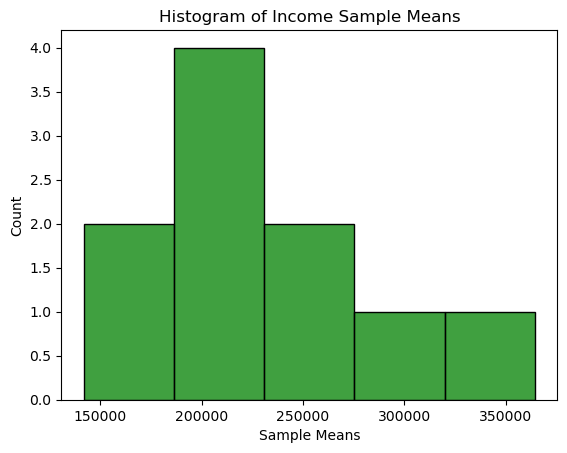

In [55]:
# Histogram of income sample means
sns.histplot(income_sample_means_10, color='green',bins=5)
plt.xlabel('Sample Means')
plt.title('Histogram of Income Sample Means')
plt.show()

In [41]:
def visualize_sample_mean(population_mean, sample_mean_list):
    '''
    population_mean: Mean of the entire population.
    sample_mean_list: List of sample means.
    '''
    # Create a histogram of the sample mean distribution using Seaborn
    ax = sns.histplot(sample_mean_list, kde=True)  # Add 'kde=True' for a kernel density estimate plot.

    # Plot vertical lines for the population mean and sample mean
    ax.axvline(population_mean, color='black', linestyle='solid', lw=1, label='Population Mean')
    ax.axvline(sum(sample_mean_list) / len(sample_mean_list), color='red', linestyle='dashed', lw=1, label='Sample Mean')

    plt.xlabel('Mean of Samples')
    plt.ylabel('Frequency')

    # Add a legend to the plot
    plt.legend()

    # Display the plot
    plt.show()

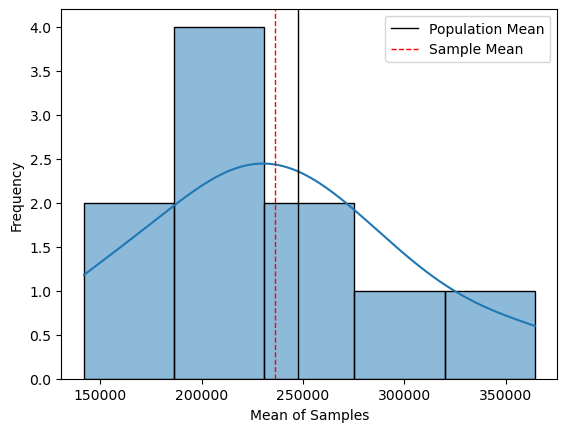

In [59]:
# Visualize the distribution of sample means along with the population mean
visualize_sample_mean(mean_income, income_sample_means_10)

##### 4.B Describe the shape of the histogram.

**ANSWER:**
SN_note:


##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

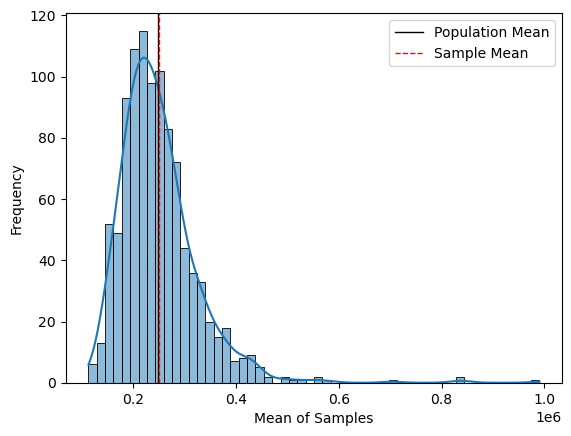

In [63]:
# ANSWER
# Using defined function "calculate_sample_mean(df, column_name, N=10, sample_size=5)"
income_sample_means_1000_15 = calculate_sample_mean(house_hold, 'Total Household Income', N=1000, sample_size=15)

# Visualize the distribution of sample means along with the population mean
visualize_sample_mean(mean_income, income_sample_means_1000_15)

##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

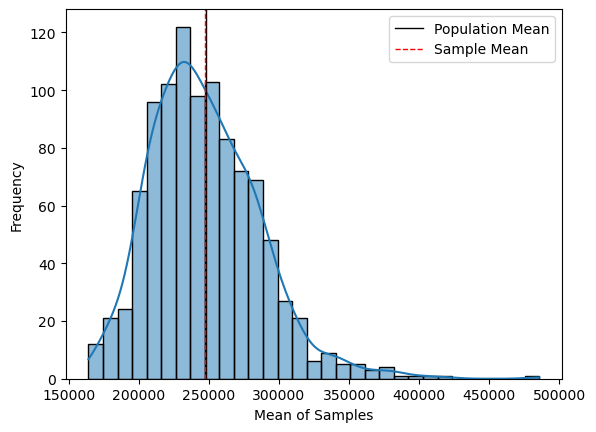

In [64]:
# ANSWER
# Using defined function "calculate_sample_mean(df, column_name, N=10, sample_size=5)"
income_sample_means_1000_50 = calculate_sample_mean(house_hold, 'Total Household Income', N=1000, sample_size=50)

# Visualize the distribution of sample means along with the population mean
visualize_sample_mean(mean_income, income_sample_means_1000_50)

##### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**
SN_Note: The shape of the histogram (using sample size of 50) looked similar to that of a normal distribution.

##### 8.B What is mean of the distribution of sample means?

In [67]:
# ANSWER
sample_means_mean = np.mean(income_sample_means_1000_50)
print(sample_means_mean)

247176.83777999997


**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

##### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**
SN_note: Yes. The center of the histogram starts to align with the population mean.



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



